<a href="https://colab.research.google.com/github/Amith1434/My_Classification_models/blob/main/classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import pandas as pd
import numpy as np
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [2]:
X,y=make_circles(n_samples=1000,noise=.03,random_state=42)
len(X),len(y)

(1000, 1000)

In [3]:
X.shape

(1000, 2)

In [4]:
dataset = pd.DataFrame({"X1":X[:,0],"X2":X[:,1],'label':y})
dataset.head(6)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1


In [5]:
import matplotlib.pyplot as plt

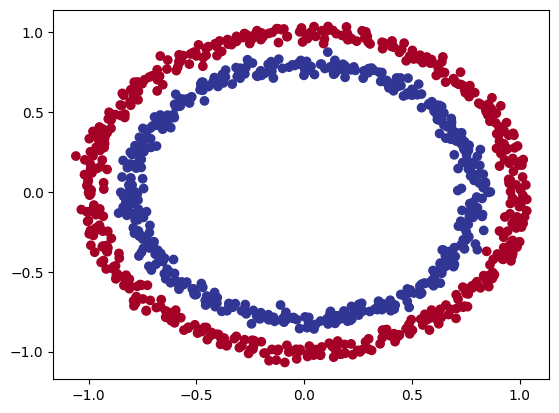

In [6]:
plt.scatter(x=dataset['X1'],y=dataset["X2"],c=y,cmap=plt.cm.RdYlBu)

In [7]:
X.shape,y.shape

((1000, 2), (1000,))

In [8]:
X.dtype,y.dtype

(dtype('float64'), dtype('int64'))

See that the points are in a circle where each colour represents different classes.<br><br>

let's see by adding, <br>
model1 : only linear layers and then <br>
model2 : with ReLU layers to the classifier

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1000 non-null   float64
 1   X2      1000 non-null   float64
 2   label   1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [10]:
#Turn dataframe to tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [11]:
X.shape,y.shape

(torch.Size([1000, 2]), torch.Size([1000]))

In [12]:
X.dtype,y.dtype

(torch.float32, torch.float32)

In [13]:
X

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        ...,
        [-0.1369, -0.8100],
        [ 0.6704, -0.7675],
        [ 0.2811,  0.9638]])

Split the dataset

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.3)

In [15]:
from torch import nn

###Model1

In [16]:
from torch import nn
class circleModel1(nn.Module):
  def __init__(self):
    super(circleModel1,self).__init__()
    self.layer1 = nn.Linear(2,5)
    self.layer2 = nn.Linear(5,1)

  def forward(self,x):
    return self.layer2(self.layer1(x))

#creating an instance
model1=circleModel1()
model1

circleModel1(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [17]:
#Set up the loss function and optimizer

In [18]:
model1.parameters()

<generator object Module.parameters at 0x7ee13361b680>

In [19]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model1.parameters(),lr=0.1)  #lr=Learning Rate

In [20]:
#Learing about logits, prediction probabilities, predictions
model1.eval()
with torch.inference_mode():
  y_logits=model1(X_test)[:5]
  print(y_logits)
  y_preds_pro = torch.sigmoid(y_logits)
  print("y_pred_pro",y_preds_pro)
  y_preds=torch.round(y_preds_pro)
  print("Y Preds: ",y_preds.squeeze())

tensor([[0.2795],
        [0.1027],
        [0.4790],
        [0.2240],
        [0.0601]])
y_pred_pro tensor([[0.5694],
        [0.5257],
        [0.6175],
        [0.5558],
        [0.5150]])
Y Preds:  tensor([1., 1., 1., 1., 1.])


raw logits -> prediction probability,   use sigmoid or softmax<br>
prediction probability -> prediction labels, use round or argmax

In [21]:
def accuracy_fn(y_true,y_preds):
  y_true = y_true.detach()
  y_preds = y_preds.detach()
  correct = torch.eq(y_true,y_preds).sum().item()
  acc = (correct/len(y_preds))*100
  return acc

In [22]:
#Building the training and testing loop
#Refer the pytorch song
torch.manual_seed(42)
epochs=100
for epoch in range(epochs):
  model1.train()

  #do the forward pass
  y_logits = model1(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  #calculate the loss
  loss = loss_fn(y_logits,y_train)
  accuracy = accuracy_fn(y_train,y_preds)

  #optimizer zero grad
  optimizer.zero_grad()

  loss.backward()

  #optimizer step step
  optimizer.step()

  model1.eval()
  with torch.inference_mode():
    test_logits = model1(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_test,test_preds)

  if epoch%10==0:
    print("Epoch : ",epoch)
    print(f"Train Loss : {loss}  | Train Accuracy : {accuracy}")
    print(f"Test Loss : {test_loss}  | Test Accuracy : {test_acc}")

Epoch :  0
Train Loss : 0.7052333950996399  | Train Accuracy : 52.0
Test Loss : 0.7047426700592041  | Test Accuracy : 50.33333333333333
Epoch :  10
Train Loss : 0.7008379101753235  | Train Accuracy : 51.857142857142854
Test Loss : 0.6994571685791016  | Test Accuracy : 51.0
Epoch :  20
Train Loss : 0.6985640525817871  | Train Accuracy : 51.28571428571429
Test Loss : 0.6967713832855225  | Test Accuracy : 50.66666666666667
Epoch :  30
Train Loss : 0.6972010731697083  | Train Accuracy : 51.42857142857142
Test Loss : 0.6952831745147705  | Test Accuracy : 50.66666666666667
Epoch :  40
Train Loss : 0.6962869763374329  | Train Accuracy : 50.57142857142857
Test Loss : 0.6944089531898499  | Test Accuracy : 49.333333333333336
Epoch :  50
Train Loss : 0.6956260204315186  | Train Accuracy : 50.857142857142854
Test Loss : 0.6938783526420593  | Test Accuracy : 49.666666666666664
Epoch :  60
Train Loss : 0.6951250433921814  | Train Accuracy : 50.71428571428571
Test Loss : 0.6935542225837708  | Test Ac

In [38]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

This helper funtion is used to see the model prediction in graph. <br>

Right now I didn't understand the code for this function.

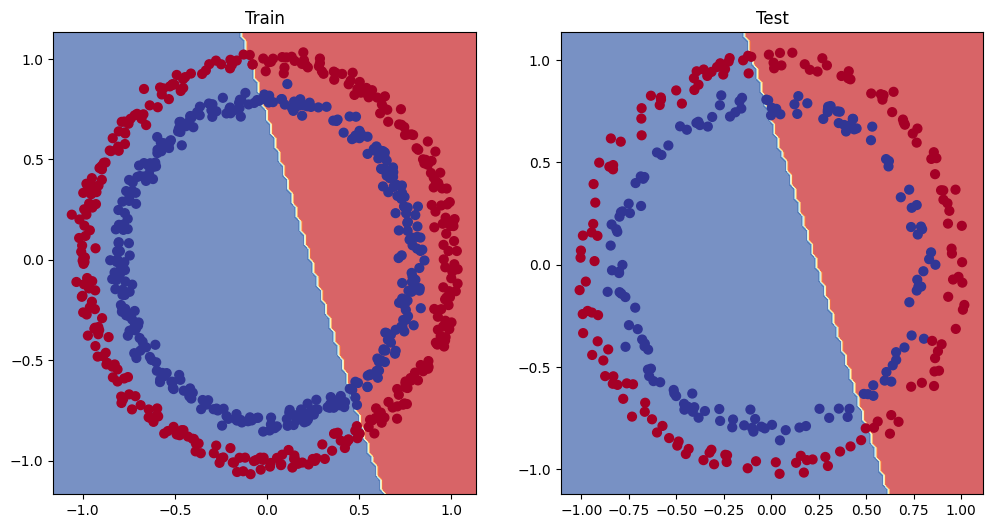

In [40]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model1, X_test, y_test)

In [23]:
#The accuracy is low because the model is trying to draw a line that separtes class 0 and 1 but it is impossible since the points are in circular manner

###Model2 (using Relu layer)

In [51]:
X_train[:6],y_train[:6]

(tensor([[-0.9342, -0.2457],
         [-0.9256,  0.3373],
         [ 0.9073,  0.1618],
         [ 0.9844, -0.2257],
         [-1.0015, -0.1795],
         [ 0.5449,  0.6130]]),
 tensor([0., 0., 0., 0., 0., 1.]))

In [52]:
X_test[:6],y_test[:6]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711]]),
 tensor([1., 0., 1., 0., 1., 1.]))

In [53]:
X_test.shape,y_test.shape

(torch.Size([300, 2]), torch.Size([300]))

In [54]:
X_train.shape,y_train.shape

(torch.Size([700, 2]), torch.Size([700]))

In [55]:
y_train.ndim,y_test.ndim,X_train.ndim,X_test.ndim

(1, 1, 2, 2)

In [66]:
#Another way to define the layers is using nn.sequencial
model2 = nn.Sequential(
    nn.Linear(2,5),
    nn.ReLU(),
    nn.Linear(5,1),
    nn.ReLU()                   #5 is the hidden layers
)
model2

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=1, bias=True)
  (3): ReLU()
)

In [67]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params = model2.parameters(),lr=.01)

In [68]:
epochs = 1000
for epoch in range(epochs):
  model2.train()
  y_logits = model2(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))
  loss= loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_train,y_preds)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model2.eval()
  with torch.inference_mode():
    test_logits=model2(X_test).squeeze()
    test_preds=torch.round(torch.sigmoid(test_logits))
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_test,test_preds)

  if epoch%100==0:
    print("Epoch : ",epoch)
    print(f"Train Loss : {loss} | Train Accuracy : {acc}")
    print(f"Test loss : {test_loss} | Test Accuracy : {test_acc}")

Epoch :  0
Train Loss : 0.6914775371551514 | Train Accuracy : 66.42857142857143
Test loss : 0.6920271515846252 | Test Accuracy : 61.33333333333333
Epoch :  100
Train Loss : 0.6383530497550964 | Train Accuracy : 60.285714285714285
Test loss : 0.6536422967910767 | Test Accuracy : 53.333333333333336
Epoch :  200
Train Loss : 0.5124365091323853 | Train Accuracy : 80.42857142857143
Test loss : 0.5522867441177368 | Test Accuracy : 74.33333333333333
Epoch :  300
Train Loss : 0.45190855860710144 | Train Accuracy : 87.85714285714286
Test loss : 0.496870219707489 | Test Accuracy : 83.66666666666667
Epoch :  400
Train Loss : 0.4204047620296478 | Train Accuracy : 91.85714285714286
Test loss : 0.4727001488208771 | Test Accuracy : 86.0
Epoch :  500
Train Loss : 0.40490496158599854 | Train Accuracy : 93.14285714285714
Test loss : 0.45564600825309753 | Test Accuracy : 88.66666666666667
Epoch :  600
Train Loss : 0.3955409824848175 | Train Accuracy : 94.71428571428572
Test loss : 0.4483185410499573 | Te

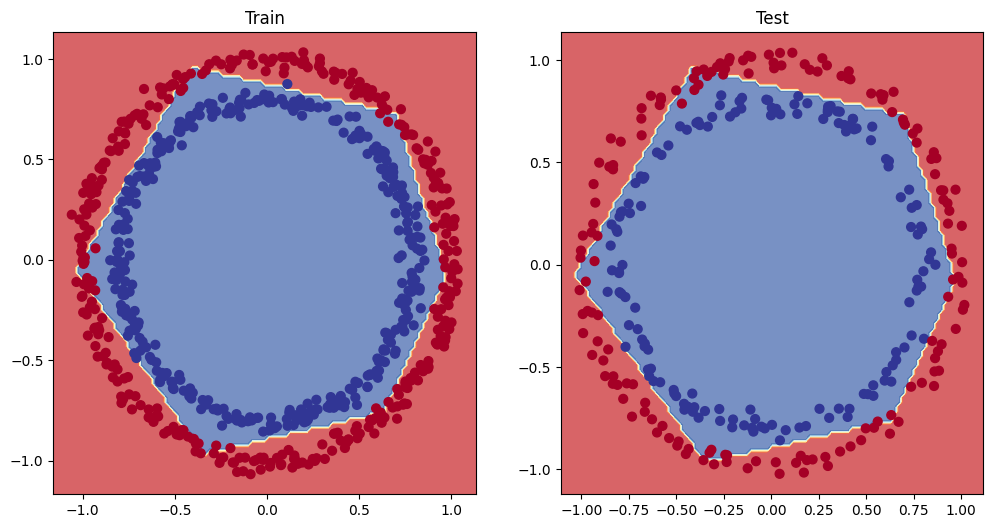

In [69]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model2, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model2, X_test, y_test)